In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

import scipy.stats.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Big Data Waterloo/Melbourne_housing_FULL.csv")

In [29]:
df = df.dropna(subset=["Price"])
if "Postcode" in df: del df["Postcode"]
if "Address" in df: del df["Address"]
if "SellerG" in df: del df["SellerG"]

if "YearBuilt" in df: del df["YearBuilt"]
if "YearBuilt" in df: del df["BuildingArea"]

df = df.dropna()

df['Date'] = pd.to_datetime(df['Date'])

In [30]:
# Computing IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df = df.query('(@Q1 - 1.5 * @IQR) <= Price <= (@Q3 + 1.5 * @IQR)')

In [31]:
df = df[df['Rooms'] <= 6]
df = df[df['Bathroom'] <= 4] 
df = df[df['Type'] == "h"]  
df["logprice"] = np.log(df["Price"])

df = df[ (df['Regionname'] == 'Western Metropolitan')|(df['Regionname'] == 'South-Eastern Metropolitan')]

# df.to_csv("reg_data.csv")

In [32]:
df

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,logprice
67,Airport West,3,h,730000.0,VB,2016-03-12,13.5,3.0,2.0,1.0,0.0,145.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,13.500800
68,Airport West,3,h,770000.0,SP,2017-04-03,13.5,3.0,2.0,1.0,0.0,145.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,13.554146
70,Airport West,2,h,603000.0,S,2017-04-03,13.5,2.0,1.0,1.0,272.0,84.0,Moonee Valley City Council,-37.72940,144.88800,Western Metropolitan,3464.0,13.309672
72,Airport West,3,h,600000.0,S,2017-04-03,13.5,2.0,1.0,1.0,290.0,116.0,Moonee Valley City Council,-37.72730,144.87440,Western Metropolitan,3464.0,13.304685
80,Airport West,4,h,785000.0,S,2016-06-08,13.5,3.0,1.0,2.0,597.0,127.0,Moonee Valley City Council,-37.72590,144.87920,Western Metropolitan,3464.0,13.573439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34828,West Footscray,3,h,900000.0,PI,2018-02-24,6.4,3.0,1.0,2.0,460.0,112.0,Maribyrnong City Council,-37.80139,144.86458,Western Metropolitan,5058.0,13.710150
34836,Wheelers Hill,5,h,1400000.0,S,2018-02-24,16.7,5.0,2.0,2.0,739.0,293.0,Monash City Council,-37.89304,145.18475,South-Eastern Metropolitan,7392.0,14.151983
34837,Williamstown,5,h,2020000.0,S,2018-02-24,6.8,5.0,3.0,2.0,450.0,241.0,Hobsons Bay City Council,-37.86180,144.87855,Western Metropolitan,6380.0,14.518608
34853,Yarraville,2,h,888000.0,SP,2018-02-24,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,13.696727


In [35]:
result = ols(formula="logprice ~ Rooms + Distance + Regionname", data=df).fit()
print(result.params)
print(result.summary())

Intercept                             14.059635
Regionname[T.Western Metropolitan]    -0.519258
Rooms                                  0.169449
Distance                              -0.038898
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     574.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.22e-270
Time:                        04:04:40   Log-Likelihood:                -238.77
No. Observations:                2041   AIC:                             485.5
Df Residuals:                    2037   BIC:                             508.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

In [38]:
result = ols(formula="logprice ~ Rooms + Distance + Regionname + Lattitude + Longtitude", data=df).fit()
print(result.params)
print(result.summary())

Intercept                            -245.997295
Regionname[T.Western Metropolitan]      0.240813
Rooms                                   0.176104
Distance                               -0.026406
Lattitude                              -0.190025
Longtitude                              1.739517
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     458.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        04:05:16   Log-Likelihood:                -94.326
No. Observations:                2041   AIC:                             200.7
Df Residuals:                    2035   BIC:                             234.4
Df Model:                           5                      

In [55]:
result = ols(formula="logprice ~ Rooms + Distance + Regionname + Lattitude + Longtitude", data=df).fit()
print(result.params)
print(result.summary())

Intercept                                  -154.609162
Regionname[T.Northern Metropolitan]          -0.116050
Regionname[T.South-Eastern Metropolitan]      0.030404
Regionname[T.Southern Metropolitan]           0.196700
Regionname[T.Western Metropolitan]           -0.041213
Rooms                                         0.174776
Distance                                     -0.039153
Lattitude                                    -0.628065
Longtitude                                    0.997266
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1381.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        05:43:25   Log-Likelihood:                -217.55
No. Observations

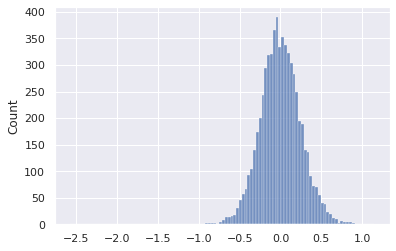

In [66]:
sns.histplot(result.resid)

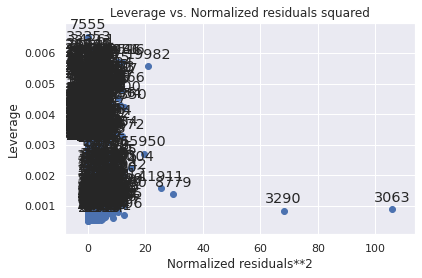

In [63]:
fig = sm.graphics.plot_leverage_resid2(result)
fig.tight_layout(pad=1.0)